In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [2]:
# Load the datasets

df_extra_train = pd.read_csv("train_dataset.csv")
df_extra_test = pd.read_csv("test_dataset.csv")
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_extra_train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


In [3]:
# Check for missing values in extra train and test data

df_extra_train.isnull().sum()

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [4]:
df_extra_test.isnull().sum()

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

In [5]:
# Examine the data types of each column in train and test data

df_extra_train.dtypes

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

In [6]:
df_extra_test.dtypes

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
dtype: object

In [7]:
# Analyse summary statistics in train and test data

df_extra_train.describe(percentiles=[0.01, 0.99])

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
1%,1.192400,1.000000,0.000000,0.000000,0.000000,6.180000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.120000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
99%,15.720000,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,148.870000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [8]:
df_extra_test.describe(percentiles=[0.01, 0.99])

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000
mean,6.593380,3.104357,2.509873,0.814231,2.205074,13.811654,0.559956,0.346387,18.884170,28041.307446,0.614231,0.356315,0.587645,0.587645,0.567016
std,3.452237,0.829806,1.494819,1.301400,1.112879,4.624430,0.496420,0.475845,10.229625,5700.350448,0.486803,0.478936,0.492286,0.492286,0.495516
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.220000,1.000000,0.000000,0.000000,0.000000,6.180000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.970000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
99%,15.707200,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,19.750000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


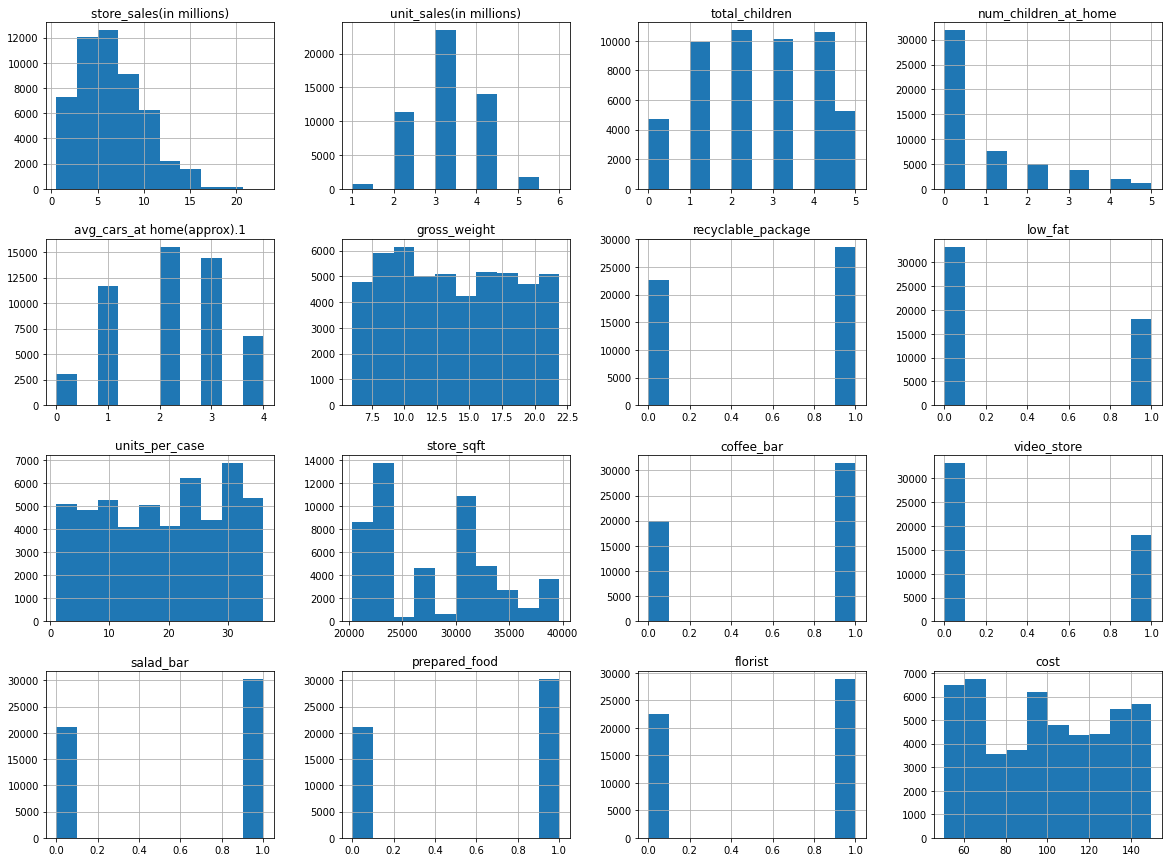

In [9]:
# Create histogram of the train and test datasets

df_extra_train.hist(figsize=(20, 15))
plt.show()

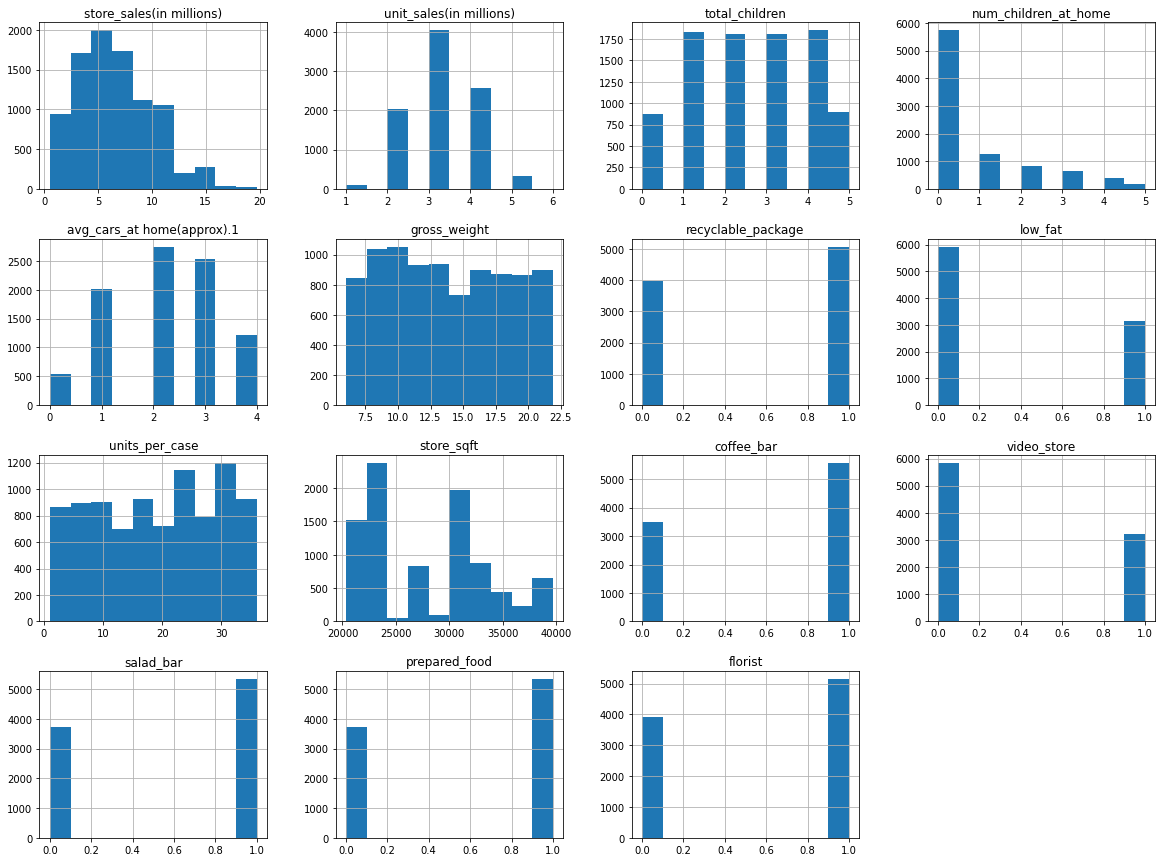

In [10]:
df_extra_test.hist(figsize=(20, 15))
plt.show()

In [11]:
# # Pairplot of entire dataset to observe the correlation between features and also with the target variable

# sns.pairplot(df)
# plt.show()

In [12]:
df = df.drop("id", axis=1)
df_test = df_test.drop("id", axis=1)

new_train = pd.concat([df, df_extra_train], axis=0, ignore_index=True)
new_test = pd.concat([df_test, df_extra_test], axis=0, ignore_index=True)

new_train.to_csv("new_train.csv", index=False)
new_test.to_csv("new_test.csv", index=False)

### OBSERVATIONS

1. No missing values in any of the columns
2. All columns contain numberical values (either floats or ints)
3. Features such store_sales, unit_sales, total_children, num_children_at_home, avg_cars_at_home, gross_weight, units_per_case, store_sqft and target variable cost are continous values while the rest are categorical values
4. id column will probably useless and will be dropped
5. store_sales might contain outliers, but for now I consider the outliers a natural part of the sample data
6. Takes roughly 3m to run the pairplot on my laptop, so comment out after initial analysis
7. Comparing the train and test data, the mean, standard deviations and data distribution of all the features are similar. so the data should be split in train and validation sets to mimic these distributions

In [ ]:
# # Create bins based on quantiles of the target variables

# num_bins = 16
# labels = np.arange(1, num_bins+1)
# df["cost_bins"] = pd.qcut(df["cost"], q=num_bins, labels=labels)

# # Split the training data in train and validation data, maintaining the distribution of the bins
# train_train, train_val = train_test_split(df, test_size=0.2, random_state=5, stratify=df["cost_bins"])

# # Remove the cost_bins column from the original dataframe
# df.drop("cost_bins", axis=1, inplace=True)

In [ ]:
# # Save the train_train and train_val data to local memory

# train_train.to_csv("validation_datas/train.csv", index=False)
# train_val.to_csv("validation_datas/val.csv", index=False)

### THE WORK BEGINS!!!

In [30]:
# Load the train and test datasets

train_path = "./new_train.csv"
test_path = "./test.csv"

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(test_path)

df_train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [31]:
# Feature generation for training

df_train["store_sales_per_sqft"] = df_train["store_sales(in millions)"] / df_train["store_sqft"]
df_train["unit_sales_per_sqft"] = df_train["unit_sales(in millions)"] / df_train["store_sqft"]
df_train["sales_ratio"] = df_train["store_sales(in millions)"] / df_train["unit_sales(in millions)"]
df_train["total_amenities"] = df_train["coffee_bar"] + df_train["video_store"] + df_train["salad_bar"] + df_train["prepared_food"] + df_train["florist"]
df_train["socially_conscious"] = df_train["recyclable_package"] + df_train["low_fat"]

df_train["child_car_ratio"] = df_train["total_children"] / np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["children_diff"] = df_train["total_children"] - df_train["num_children_at_home"]
df_train["avg_sales_per_child"] = df_train["store_sales(in millions)"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_unit_sales_per_child"] = df_train["unit_sales(in millions)"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_store_sqft_per_child"] = df_train["store_sqft"] / np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["avg_cars_per_child_at home"] = df_train["avg_cars_at home(approx).1"] / np.where(df_train["num_children_at_home"] == 0, 1e-6, df_train["num_children_at_home"])

# Interactive features
df_train["store_sqft_total_children"] = df_train["store_sqft"] * np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"])
df_train["store_sqft_avg_cars_at home"] = df_train["store_sqft"] * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["total_children_avg_cars_at home"] = np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])
df_train["store_sqft_total_children_avg_cars_at home"] = df_train["store_sqft"] * np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) * np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"])

# Polynomial features
df_train["store_sqft_squared"] = df_train["store_sqft"] ** 2
df_train["total_children_squared"] = np.where(df_train["total_children"] == 0, 1e-6, df_train["total_children"]) ** 2
df_train["avg_cars_at home_squared"] = np.where(df_train["avg_cars_at home(approx).1"] == 0, 1e-6, df_train["avg_cars_at home(approx).1"]) ** 2
df_train["store_sqft_cubed"] = df_train["store_sqft"] ** 3
df_train["total_children_cubed"] = df_train["total_children"] ** 3
df_train["avg_cars_at home_cubed"] = df_train["avg_cars_at home(approx).1"] ** 3

In [32]:
# Feature generation for training

df_val["store_sales_per_sqft"] = df_val["store_sales(in millions)"] / df_val["store_sqft"]
df_val["unit_sales_per_sqft"] = df_val["unit_sales(in millions)"] / df_val["store_sqft"]
df_val["sales_ratio"] = df_val["store_sales(in millions)"] / df_val["unit_sales(in millions)"]
df_val["total_amenities"] = df_val["coffee_bar"] + df_val["video_store"] + df_val["salad_bar"] + df_val["prepared_food"] + df_val["florist"]
df_val["socially_conscious"] = df_val["recyclable_package"] + df_val["low_fat"]

df_val["child_car_ratio"] = df_val["total_children"] / np.where(df_val["avg_cars_at home(approx).1"] == 0, 1e-6, df_val["avg_cars_at home(approx).1"])
df_val["children_diff"] = df_val["total_children"] - df_val["num_children_at_home"]
df_val["avg_sales_per_child"] = df_val["store_sales(in millions)"] / np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"])
df_val["avg_unit_sales_per_child"] = df_val["unit_sales(in millions)"] / np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"])
df_val["avg_store_sqft_per_child"] = df_val["store_sqft"] / np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"])
df_val["avg_cars_per_child_at home"] = df_val["avg_cars_at home(approx).1"] / np.where(df_val["num_children_at_home"] == 0, 1e-6, df_val["num_children_at_home"])

# Interactive features
df_val["store_sqft_total_children"] = df_val["store_sqft"] * np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"])
df_val["store_sqft_avg_cars_at home"] = df_val["store_sqft"] * np.where(df_val["avg_cars_at home(approx).1"] == 0, 1e-6, df_val["avg_cars_at home(approx).1"])
df_val["total_children_avg_cars_at home"] = np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"]) * np.where(df_val["avg_cars_at home(approx).1"] == 0, 1e-6, df_val["avg_cars_at home(approx).1"])
df_val["store_sqft_total_children_avg_cars_at home"] = df_val["store_sqft"] * np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"]) * np.where(df_val["avg_cars_at home(approx).1"] == 0, 1e-6, df_val["avg_cars_at home(approx).1"])

# Polynomial features
df_val["store_sqft_squared"] = df_val["store_sqft"] ** 2
df_val["total_children_squared"] = np.where(df_val["total_children"] == 0, 1e-6, df_val["total_children"]) ** 2
df_val["avg_cars_at home_squared"] = np.where(df_val["avg_cars_at home(approx).1"] == 0, 1e-6, df_val["avg_cars_at home(approx).1"]) ** 2
df_val["store_sqft_cubed"] = df_val["store_sqft"] ** 3
df_val["total_children_cubed"] = df_val["total_children"] ** 3
df_val["avg_cars_at home_cubed"] = df_val["avg_cars_at home(approx).1"] ** 3

### GET BASELINE USING XGBOOST, LIGHTGBM AND CATBOOST

In [33]:
# Separate features and target for train and test data
# Code is setup to either use the stratified train-val split data or the original train-test data provided

try:
    X_train = df_train.drop(["cost"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop(["id", "cost"], axis=1)
    y_test = df_val["cost"]

except KeyError:
    X_train = df_train.drop(["cost"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop("id", axis=1)


In [17]:
# Perform cross-validation and calculate the RMSLE

def evaluate_model(model, X, y, n_splits=5):
    rmsle_scores = []    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=5)

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        # Clip predictions to avoid negative values
        y_pred = np.clip(y_pred, 1e-6, np.max(y_pred))

        rmsle = mean_squared_log_error(y_test_cv, y_pred, squared=False)
        rmsle_scores.append(rmsle)
    
    return rmsle_scores

In [18]:
# Initialize the models

models = {
    "LightGBM": lgb.LGBMRegressor(random_state=5),
    "xGBoost": xgb.XGBRegressor(random_state=5),
    "CatBoost": CatBoostRegressor(silent=True, random_state=5),
}

### OBSERVATIONS - BASELINE AFTER STRATIFYING SPLIT DATA INTO TRAIN AND VALIDATION

1. Baseline LightGBM RMSLE is 0.303294
2. Baseline xGBoost RMSLE is 0.302591
3. Baseline CatBoost RMSLE is 0.302491
4. Baseline Random Forest RMSLE is 0.310002
5. Baseline SGD RMSLE is 28.623026

CatBoost performed the best on baseline data before feature engineering and data pre-processing

6. Plotting feature importance, the most noticeable peaks in the LightGBM model which shows in order of importance store_sqft, total_children, avg_cars_at_home
7. Plotting feature importance, the most noticeable peaks in the xGBoost model which shows in order of importance florist, store_sqft, video_store
8. Plotting feature importance, the most noticeable peaks in the CatBoost model which shows in order of importance store_sqft, total_children, avg_cars_at_home
9. Plotting feature importance, the most noticeable peaks in the Random Forest model which shows in order of importance store_sales, gross_weight, units_per_case
10. SGD Regressor does not have feature importance

Model: LightGBM
RMSLE Scores: [0.30094893258885896, 0.3021840836116403, 0.30179628979024903, 0.30221664234546297, 0.30305438369430016]
Average RMSLE: 0.302040
Std. Deviation: 0.000683

Model: xGBoost
RMSLE Scores: [0.2994126441374085, 0.30033402801361136, 0.30008166845596757, 0.30042097684974456, 0.3013923957350376]
Average RMSLE: 0.300328
Std. Deviation: 0.000639

Model: CatBoost
RMSLE Scores: [0.29878918087076145, 0.29987928684256393, 0.29968794803853127, 0.29990748439226395, 0.3007474532758372]
Average RMSLE: 0.299802
Std. Deviation: 0.000624



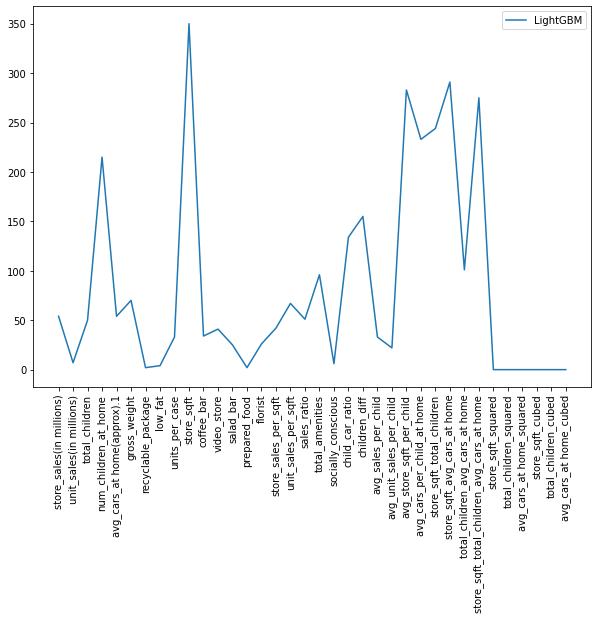

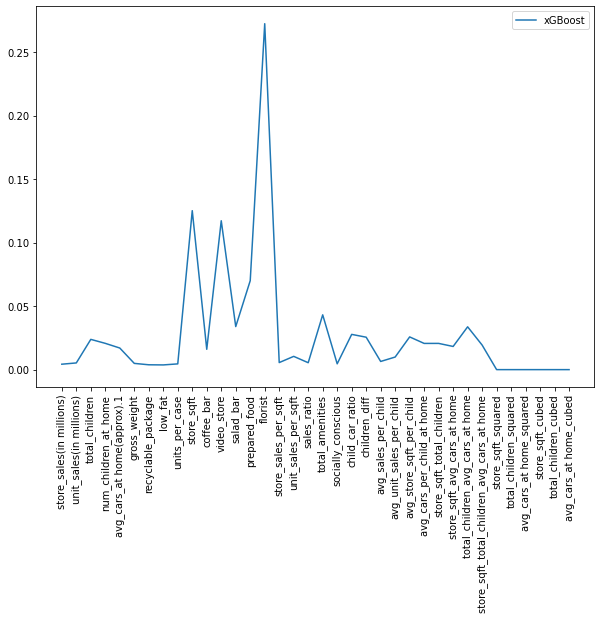

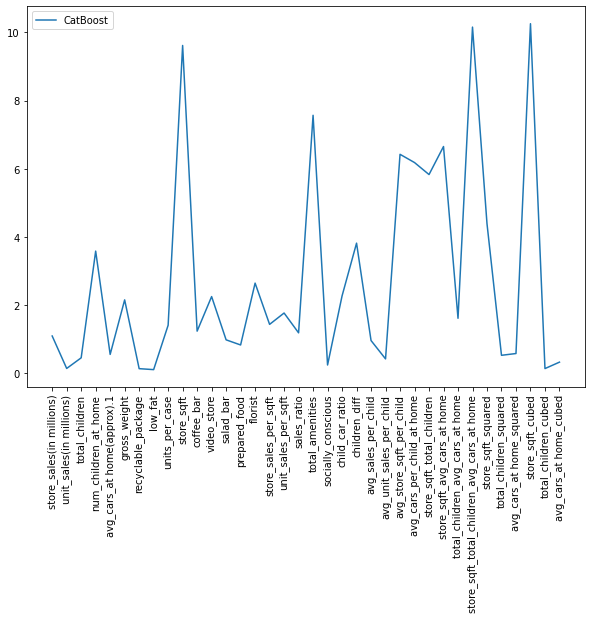

In [19]:
for name, model in models.items():
    rmsle_scores = evaluate_model(model, X_train, y_train)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.figure(figsize=(10, 7))
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have "feature_importances_"
        pass
    print()

### OBSERVATION - USE TRAIN DATA TO CROSS VALIDATE WITH K-FOLD AND SEE THE RMSLE SCORES PER FOLD AND MEAN RMSLE
### TRYING CV FOR 5 AND 10 FOLDS THEN SETTLING ON EITHER

##### 5 FOLDS
1. LightGBM mean RMSLE is 0.301388, Standard deviation of 0.000881
2. xGBoost mean RMSLE is 0.299834, Standard deviation of 0.000885
3. CatBoost mean RMSLE is 0.299319, Standard deviation of 0.000897

CatBoost performed the best on training data that is cross validated with 5 folds

Run time ~ 5 minutes

Model: LightGBM
RMSLE Scores: [0.3006558726757903, 0.3010597899703474, 0.30177588286987345, 0.3019605485295297, 0.3017622216572657, 0.30093640732847254, 0.30180504066314945, 0.30234176245264704, 0.30348715703099566, 0.3022979094849106]
Average RMSLE: 0.301808
Std. Deviation: 0.000776

Model: xGBoost
RMSLE Scores: [0.2987823016972345, 0.29912135707047005, 0.3001157884574846, 0.3002110191219393, 0.3001195095906664, 0.2993849148293049, 0.2997546700044277, 0.3004820806436091, 0.3019988516383451, 0.30049624449109497]
Average RMSLE: 0.300047
Std. Deviation: 0.000850

Model: CatBoost
RMSLE Scores: [0.29817278838076644, 0.2985199378915091, 0.29965509260847567, 0.2995044536671111, 0.29944766271364154, 0.2990563302037549, 0.2995200700638393, 0.2998155560152549, 0.30121829172709647, 0.3001837972194657]
Average RMSLE: 0.299509
Std. Deviation: 0.000804



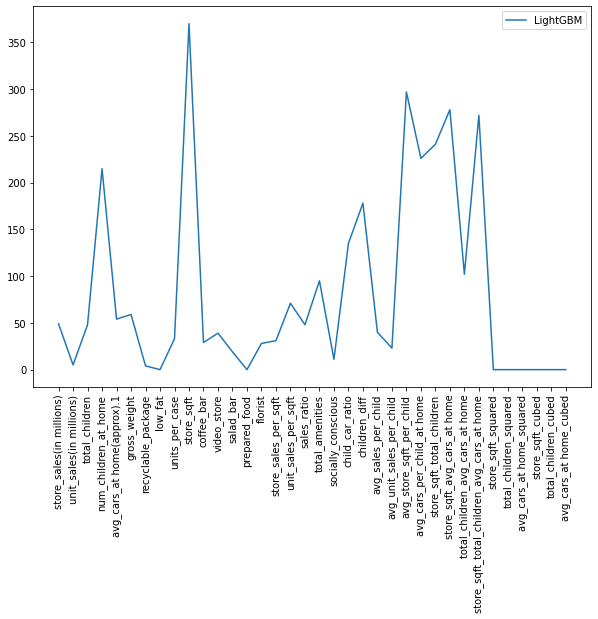

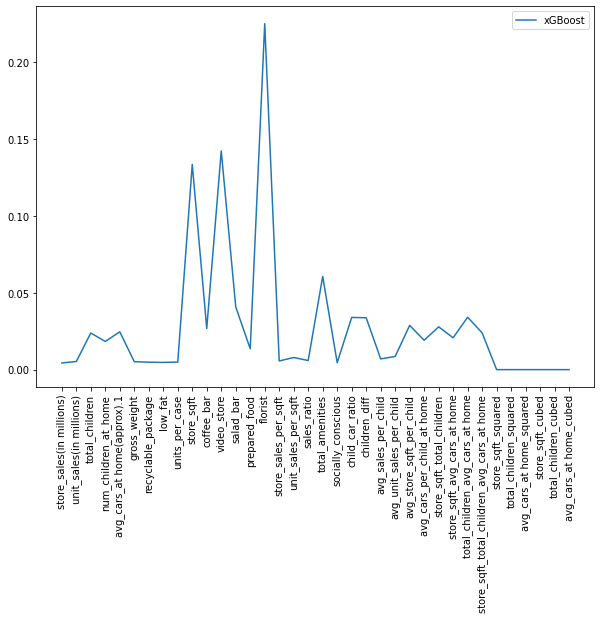

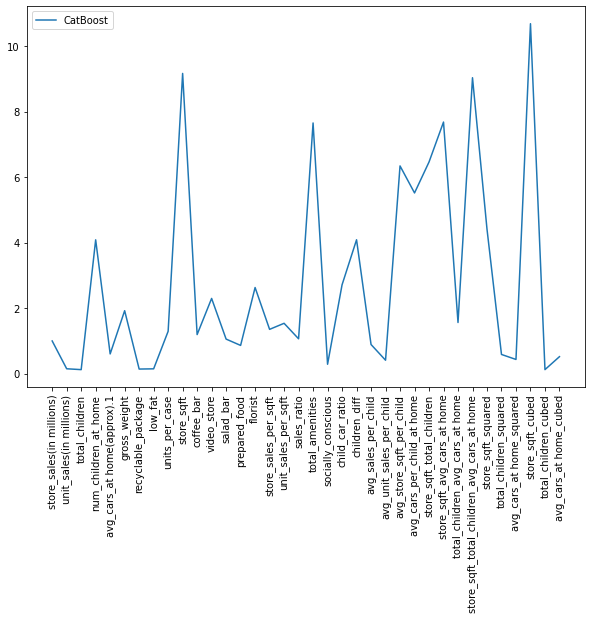

In [20]:
for name, model in models.items():
    rmsle_scores = evaluate_model(model, X_train, y_train, n_splits=10)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.figure(figsize=(10, 7))
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have "feature_importances_"
        pass
    print()


##### 10 FOLDS
1. LightGBM mean RMSLE is 0.301203, Standard deviation of 0.000898
2. xGBoost mean RMSLE is 0.299582, Standard deviation of 0.001059
3. CatBoost mean RMSLE is 0.299076, Standard deviation of 0.000923

CatBoost performed the best on training data that is cross validated with 10 folds

Run time ~ 10 minutes

# PREDICTION STATION

In [21]:
cat = CatBoostRegressor(silent=True, random_state=5)

cat.fit(X_train, y_train)

In [34]:
# Predict the final submission values

y_final = cat.predict(X_test)
df_val["cost"] = y_final

df_val[["id", "cost"]].to_csv("submission.csv", index=False)